# Анализ множественных прогонов нейросети для модели Крюков-Шолохов

In [106]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

%run main_serv.py
auth_load=authors.copy()

curIndex=-1

      file_mask  fire  in_use    strFileDir       strRuName  \
index                                                         
kru           *     0    True        Krukov       Ф. Крюков   
sho       *.txt     0    True     Sholokhov      М. Шолохов   
ltol          *     0    True       Tolstoy      Л. Толстой   
atol      *.txt     0    True      ATolstoy      A. Толстой   
sera      *.txt     0    True  Serafimovich  А. Серафимович   
fad       *.txt     0    True       Fadeyev       А. Фадеев   
bab       *.txt     0    True         Babel       И. Бабель   
kat       *.txt     0    True        Kataev       В. Катаев   
pla       *.txt     0    True      Platonov     А. Платонов   
blg       *.txt     0    True      Bulgakov     М. Булгаков   

                                    strUrl  
index                                       
kru        http://az.lib.ru/k/krjukow_f_d/  
sho      http://www.lib.ru/PROZA/SHOLOHOW/  
ltol                                        
atol              

## Filter result files (jnly selected authors)

In [107]:
res_list=['result/lt1', 
          'result/at1',
          'result/f1', 
          'result/ga1', 
          'result/ilf1', 
          'result/ka1', 
          'result/mm', 
          'result/o1',
          'result/pa1', 
          'result/pl1', 
          'result/TD',
          'result/sh']
strResultDir=res_list[curIndex]

#auth_load.use(val=False)
#auth_load.use(index=['sera', 'fad', 'kru', 'sho', 'ltol', 'kat', 'pla']) # load these authors

work_list=auth_load.loc[auth_load['in_use'], 'strFileDir'].tolist()

csvs=[fl for fl in glob.glob(os.path.join(strResultDir,'*.csv')) if re.search('result_prob_', fl)]
work_au=[re.search('result_prob_(\w+).csv', auth).group(1) for auth in csvs]
work_dict=dict(zip(work_au, csvs))
work_dict=dict(filter(lambda x: x[0] in work_list, work_dict.items()))
print(work_dict)

{'Babel': 'result/sh/result_prob_Babel.csv', 'Serafimovich': 'result/sh/result_prob_Serafimovich.csv', 'ATolstoy': 'result/sh/result_prob_ATolstoy.csv', 'Tolstoy': 'result/sh/result_prob_Tolstoy.csv', 'Platonov': 'result/sh/result_prob_Platonov.csv', 'Sholokhov': 'result/sh/result_prob_Sholokhov.csv', 'Fadeyev': 'result/sh/result_prob_Fadeyev.csv', 'Bulgakov': 'result/sh/result_prob_Bulgakov.csv', 'Kataev': 'result/sh/result_prob_Kataev.csv', 'Krukov': 'result/sh/result_prob_Krukov.csv'}


## Load and prepare data

"Среднее выборок приблизительно равно среднему популяции" - в каждом результирующем файле по каждомуавторурезультат 13-циклов обучение-классификация нейросети, считаем среднее по главам, смотрим всякую статистику

In [108]:
dict_pdf={k:pd.read_csv(v, sep=';') for k, v in work_dict.items()}

prob_cols=[c for c in dict_pdf[work_au[0]].columns.tolist() if re.search('(?i)prob', c)]
plot_list=[]
for k, v in dict_pdf.items():
    print(k, v.shape)
    v[k]=v.mean(axis=1)
    draw_cols=[c for c in v.columns.tolist() if not re.search('(?i)prob', c)]
    plot_list.append(v[draw_cols].set_index(['name', 'short_text']))

Babel (232, 3)
Serafimovich (232, 3)
ATolstoy (232, 3)
Tolstoy (232, 3)
Platonov (232, 3)
Sholokhov (232, 3)
Fadeyev (232, 3)
Bulgakov (232, 3)
Kataev (232, 3)
Krukov (232, 3)


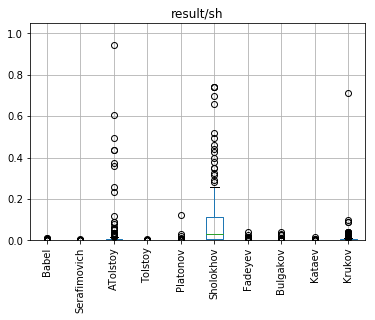

In [109]:
fig, ax=plt.subplots()

pdf_result=plot_list[0].join(plot_list[1:])

box=pdf_result.boxplot(rot=90, ax=ax)
plt.title(res_list[curIndex])
#ax.margins(y=0.05)
ax.set_ylim([0,1.05])
plt.show();
pdf_result.describe()
curIndex+=1

In [120]:
#pdf_result.loc[pdf_result.max(axis=1)>0.05, ('ATolstoy', 'Sholokhov', 'Krukov')]
pdf_result.loc[:, ('ATolstoy', 'Sholokhov', 'Krukov')].to_csv('TD_result.csv', sep=';')#.sort_values('Krukov', ascending=False)

In [90]:
pdf_result[['ATolstoy', 'Sholokhov', 'Krukov']].describe()

,ATolstoy,Sholokhov,Krukov
count,232.000000,232.000000,232.000000
mean,0.025566,0.087780,0.010080
std,0.097413,0.138462,0.048121
min,0.000241,0.000264,0.000264
25%,0.001146,0.008975,0.001501
50%,0.002528,0.029671,0.002535
75%,0.007324,0.113176,0.006344
max,0.942033,0.741744,0.712802


In [111]:
pdf_result.describe()

,Babel,Serafimovich,ATolstoy,Tolstoy,Platonov,Sholokhov,Fadeyev,Bulgakov,Kataev,Krukov
count,2.320000e+02,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000,2.320000e+02,232.000000
mean,4.445913e-04,0.000490,0.025566,0.000393,1.441980e-03,0.087780,0.002062,0.001487,4.099101e-04,0.010080
std,1.320890e-03,0.000786,0.097413,0.000707,8.466150e-03,0.138462,0.004216,0.004467,1.423412e-03,0.048121
min,2.444439e-07,0.000076,0.000241,0.000062,5.822517e-07,0.000264,0.000079,0.000002,5.886704e-07,0.000264
25%,8.356321e-06,0.000177,0.001146,0.000112,3.163808e-05,0.008975,0.000391,0.000052,1.591423e-05,0.001501
50%,4.401787e-05,0.000278,0.002528,0.000177,1.305640e-04,0.029671,0.000689,0.000220,6.181343e-05,0.002535
75%,2.177897e-04,0.000504,0.007324,0.000355,6.625158e-04,0.113176,0.001877,0.000983,2.068730e-04,0.006344
max,9.642541e-03,0.009143,0.942033,0.006991,1.230982e-01,0.741744,0.042442,0.040566,1.686340e-02,0.712802


In [114]:
pdf_result.loc[pdf_result['Sholokhov']>0.2, ['Sholokhov']].count()

Sholokhov    31
dtype: int64